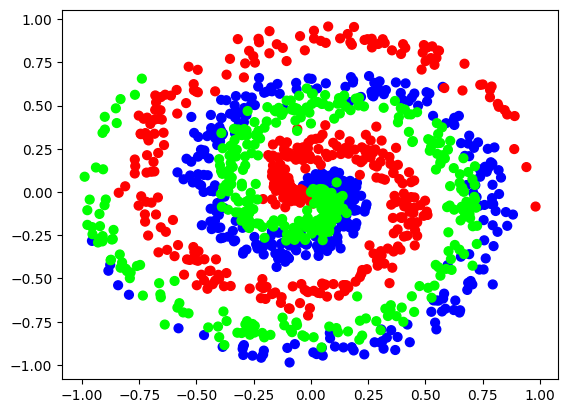

In [9]:
import numpy as np 
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()
X,y = spiral_data(samples = 400 , classes = 3)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap='brg')
plt.show()

In [34]:
# need to convert the spiral data into dataframe
# each point in the spiral is a sample with 2 features (x and y coordinates)
# and a label (the class it belongs to)
import pandas as pd
df = pd.DataFrame(X, columns=['x1', 'x2'])

In [36]:
df.head()

,x1,x2
0,0.000000,0.000000
1,0.007152,0.007133
2,0.011197,0.016815
3,-0.006595,0.029577
4,-0.007865,0.039631


In [37]:
# Dense layer
class Layer_Dense:
 # Layer initialization
 def __init__(self, n_inputs, n_neurons):
 # Initialize weights and biases
   self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
   self.biases = np.zeros((1, n_neurons))

 # Forward pass
 def forward(self, inputs):
 # Calculate output values from inputs, weights and biases
   self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self , inputs):
        self.output = np.maximum(0,inputs)
    
class Activation_softmax:
    def forward(self , inputs):
        exp_values = np.exp(inputs - np.max(inputs , axis = 1 , keepdims=True))
        self.output = exp_values/np.sum(exp_values , axis = 1 , keepdims=True)
      
class Activation_Tanh:
    def forward(self, inputs):
        self.output = np.tanh(inputs)
    

In [38]:
# Input → Hidden1(Tanh) → Hidden2(ReLU) → Output(Softmax)
dense1 = Layer_Dense(2, 3)
activation1 = Activation_Tanh()  # first hidden layer

dense2 = Layer_Dense(3, 3)
activation2 = Activation_ReLU()  # second hidden layer

dense3 = Layer_Dense(3, 3)
activation3 = Activation_softmax()  # output layer

# Forward pass
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

dense3.forward(activation2.output)
activation3.forward(dense3.output)

# Output of first 10 samples
print(activation3.output[:10])


[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.3333333  0.3333333  0.33333334]
 [0.3333333  0.3333333  0.33333334]
 [0.3333333  0.3333333  0.33333334]
 [0.3333333  0.3333333  0.33333334]]


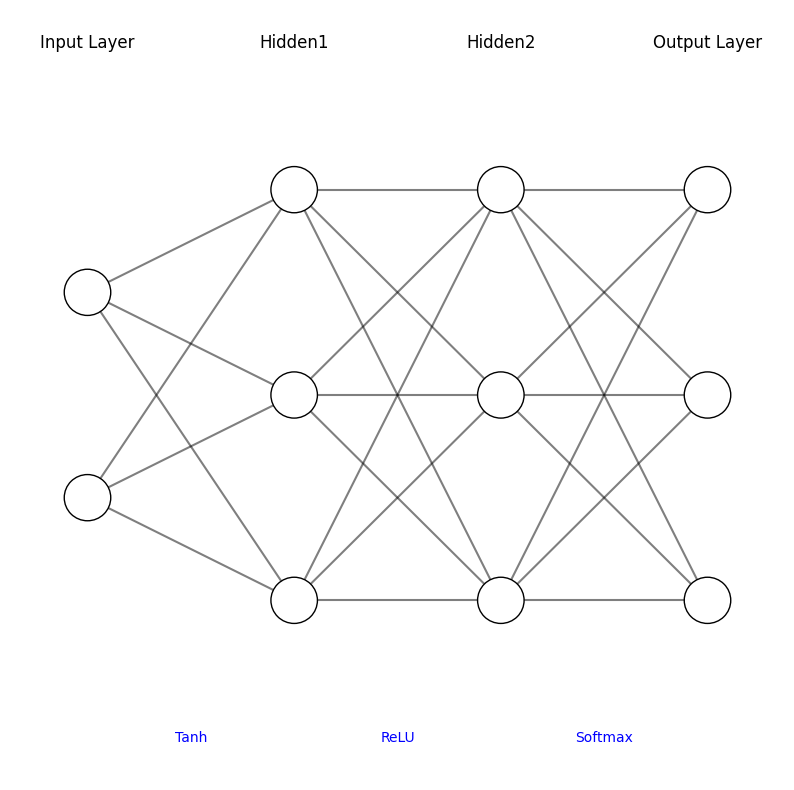

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')

# 2 input → 3 → 3 → 3 output
layer_sizes = [2, 3, 3, 3]
layer_labels = ['Input Layer', 'Hidden1', 'Hidden2', 'Output Layer']
activation_labels = ['Tanh', 'ReLU', 'Softmax']

draw_neural_net(ax, layer_sizes, layer_labels, activation_labels)
plt.show()
